In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
housing = pd.read_csv('housing_cleaned_1.csv')

In [27]:
#Splitting dataset into independent and dependent variables
X = housing.drop(['SalePrice'], axis=1)
y = housing['SalePrice']

In [28]:
# Splitting into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [29]:
# feature names in a list
feature_names_train = [x for x in X_train.columns]
feature_names_test = [x for x in X_test.columns]

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Convert back to dataframe
X_train = pd.DataFrame(data = X_train, columns = feature_names_train)
X_test = pd.DataFrame(data = X_test, columns = feature_names_test)

<strong>Use Lasso to select the more important features.</strong>

In [30]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [31]:
clf = Lasso(alpha=0.005, random_state=0)

In [32]:
feature_sel_model = SelectFromModel(clf, threshold=0.25)
feature_sel_model.fit(X_train, y_train)

C:\Users\saraa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 399176387081.02966, tolerance: 615098412.8205527
  model = cd_fast.enet_coordinate_descent(


SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0), threshold=0.25)

In [33]:
X_train = feature_sel_model.transform(X_train)
X_test = feature_sel_model.transform(X_test)

<p><strong>Modeling</strong></p>
<p>We will model (1) Linear regression, (2) Ordinary Least Squares, (3) Random Forest, and (4) SVR and decide which model is best.</p>

<strong>(1) Linear Regression</strong>

In [34]:
#Fit the model
from sklearn.linear_model import LinearRegression
LinearRegressor = LinearRegression()
LinearRegressor.fit(X_train, y_train)

LinearRegression()

In [35]:
#Calculate the R2 score
from sklearn.metrics import r2_score
y_pred = LinearRegressor.predict(X_test)
Linear_Regression_Score = r2_score(y_test, y_pred)
Linear_Regression_Score

0.8359781242064662

In [36]:
from sklearn.metrics import mean_squared_error
MSE_LR = mean_squared_error(y_test, y_pred, squared = False)
MSE_LR

33831.34682705405

Text(0, 0.5, 'Prediction')

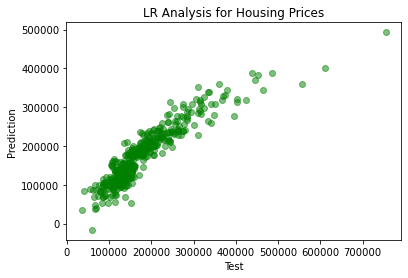

In [37]:
plt.scatter(y_test, y_pred, color='green', alpha=0.5)
plt.title('LR Analysis for Housing Prices')
plt.xlabel('Test')
plt.ylabel('Prediction')

There is a positive correlation here, but as the plot shows, houses that cost over 400,000 are predicted to have lower prices. Let's see if we can build a better model.

<strong>(2) Ordinary Least Squares</strong>

In [38]:
# Adding a constant to X is necessary for Ordinary Least Squares Regression.
X = sm.add_constant(X)

In [39]:
housing_ols = sm.OLS(y_train, X_train)
housing_ols_results = housing_ols.fit()
housing_ols_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     108.4
Date:                Mon, 08 Feb 2021   Prob (F-statistic):          3.53e-321
Time:                        05:50:24   Log-Likelihood:                -12115.
No. Observations:                1022   AIC:                         2.431e+04
Df Residuals:                     983   BIC:                         2.450e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -3893.6116   3792.637     -1.027      0.305   -1.13e+04    3548.985
x2         -4660.0872   1.64e+04     -0.285      0.776   -3.68e+04    2.75e+04
x3          8.257e+04   2.36e+04      3.504      0.000    3.63e+04    1.29e+05
x4          1.065e+05   1.38e+04      7.705      0.000    7.94e+04    1.34e+05
x5          3.292e+04   1.01e+04      3.275      0.001    1.32e+04    5.26e+04
x6         -1.081e+05   1.97e+04     -5.476      0.000   -1.47e+05   -6.94e+04
x7          2.432e+04   1.03e+04      2.351      0.019    4022.737    4.46e+04
x8          3.252e+04   9817.042      3.312      0.001    1.33e+04    5.18e+04
x9         -1.566e+04   1.37e+04     -1.145      0.252   -4.25e+04    1.12e+04
x10         4.322e+04   7855.053      5.502      0.000    2.78e+04    5.86e+04
x11        -6016.4803   1.23e+04     -0.490      0.624   -3.01e+04    1.81e+04
x12          1.51e+04   3638.538      4.151      0.000    7963.848    2.22e+04
x13         8160.4718   4098.248      1.991      0.047     118.152    1.62e+04
x14         4.818e+04    2.1e+04      2.293      0.022    6954.031    8.94e+04
x15        -4451.9743   1.12e+04     -0.396      0.692   -2.65e+04    1.76e+04
x16         1.281e+04   1.44e+04      0.887      0.375   -1.55e+04    4.11e+04
x17         8437.5769   9309.992      0.906      0.365   -9832.166    2.67e+04
x18         9562.5348   5892.201      1.623      0.105   -2000.204    2.11e+04
x19         3949.2945    1.4e+04      0.282      0.778   -2.35e+04    3.14e+04
x20         1.303e+05   2.52e+04      5.174      0.000    8.09e+04     1.8e+05
x21         1.933e+04    1.2e+04      1.608      0.108   -4260.241    4.29e+04
x22         5192.1503   5187.416      1.001      0.317   -4987.533    1.54e+04
x23         2.848e+04   8071.493      3.528      0.000    1.26e+04    4.43e+04
x24         3.172e+04   1.53e+04      2.073      0.038    1699.515    6.17e+04
x25         2.289e+04   1.01e+04      2.272      0.023    3118.665    4.27e+04
x26         3.078e+04   6836.956      4.501      0.000    1.74e+04    4.42e+04
x27         2.053e+04   8445.215      2.431      0.015    3956.664    3.71e+04
x28        -1006.2688   8802.760     -0.114      0.909   -1.83e+04    1.63e+04
x29        -5643.7123   9126.600     -0.618      0.536   -2.36e+04    1.23e+04
x30         4.851e+04    1.4e+04      3.468      0.001    2.11e+04     7.6e+04
x31         7263.2147   1.73e+04      0.419      0.675   -2.68e+04    4.13e+04
x32          4.78e+04   2.39e+04      1.998      0.046     862.262    9.47e+04
x33        -8916.6578   2.47e+04     -0.360      0.719   -5.75e+04    3.96e+04
x34         1.189e+04   7903.856      1.504      0.133   -3619.241    2.74e+04
x35        -2.763e+04   2.27e+04     -1.219      0.223   -7.21e+04    1.68e+04
x36         4298.4819   3884.123      1.107      0.269   -3323.645    1.19e+04
x3

In [40]:
y_pred = housing_ols_results.predict(X_test)

Text(0, 0.5, 'Fixed.acidity')

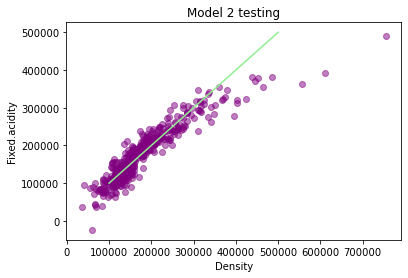

In [41]:
plt.scatter(y_test, y_pred, color='purple', alpha=0.5)

plt.plot([x for x in range(100000,500000)],[x for x in range(100000,500000)], color='lightgreen')

plt.title('Model 2 testing')
plt.xlabel('Density')
plt.ylabel('Fixed.acidity')

The R2 score for Ordinary Least Squares shows about 80% of the variance is explained by this model. Let's see if we can get a better result using multiple linear regression.

<strong>(3) Random Forest Regressor</strong>

In [42]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor()
RFR.fit(X_train,y_train)

RandomForestRegressor()

In [43]:
y_pred_RFR = RFR.predict(X_test)
RFR_Score = r2_score(y_test, y_pred_RFR)
RFR_Score

0.8948617975573424

In [44]:
MSE_RFR = mean_squared_error(y_test, y_pred_RFR, squared = False)
MSE_RFR

27086.236994117193

<strong>(4) SVR</strong>

In [45]:
from sklearn.svm import SVR
SVReg = SVR(kernel = 'rbf')
SVReg.fit(X_train, y_train)

SVR()

In [46]:
y_pred_SVR = SVReg.predict(X_test)
SVR_Score = r2_score(y_test, y_pred_SVR)
SVR_Score

-0.03120565435172762

In [47]:
MSE_SVR = mean_squared_error(y_test, y_pred_SVR, squared = False)
MSE_SVR

84828.35459253659

The random forest regressor model is the best of the models I tried because it showed the highest R2 score, with about 89% of the variance explained by the model, and the lowest mean squared error, of 27,274. SVR is the worst of the models in this report because of its low R2 score, -0.03, and high mean squared error of 84,828.

In [59]:
best_feat = np.abs(housing.corr()['SalePrice'])
best_feat_corr = pd.DataFrame(best_feat[:-1]).sort_values('SalePrice',ascending=False)
best_feat_corr

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
ExteriorQ,0.682639
Kitchen,0.659600
GarageCars,0.640409
GarageArea,0.623431
BasementQ,0.617356
FullBath,0.582934
TotRmsAbvGrd,0.533723


Text(0, 0.5, 'Features')

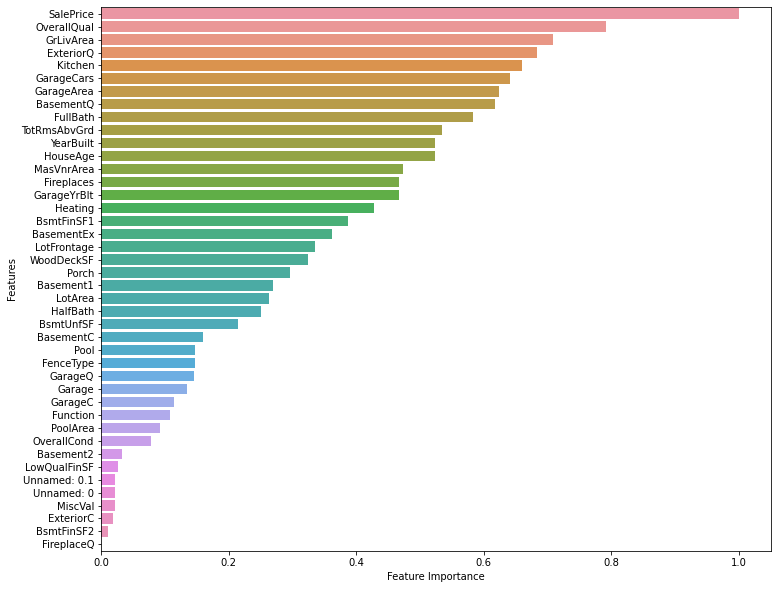

In [60]:
plt.figure(figsize=(12,10))
sns.barplot(x=best_feat_corr['SalePrice'], y=best_feat_corr.index)
plt.xlabel('Feature Importance')
plt.ylabel('Features')